In [60]:
import pandas as pd
import numpy as np

In [61]:
url_City = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
df_City = pd.read_csv(url_City)

In [62]:
df_City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [63]:
df_City.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [64]:
url_Customer_ID = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
df_Customer_ID = pd.read_csv(url_Customer_ID)
df_Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [65]:
df_Customer_ID.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [66]:
url_Transaction_ID = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'
df_Transaction_ID = pd.read_csv(url_Transaction_ID)
df_Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [67]:
df_Transaction_ID.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [68]:
url_Cab_Data = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
df_Cab_Data = pd.read_csv(url_Cab_Data)
df_Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [69]:
df_Cab_Data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [70]:
dfm1 = pd.merge(df_Customer_ID, df_Transaction_ID, how='left', left_on='Customer ID', right_on='Customer ID')
fdf = pd.merge(df_Cab_Data , dfm1 , how= 'left' , left_on= 'Transaction ID' , right_on= 'Transaction ID')
ffdf = pd.merge(fdf , df_City , how='left' , left_on= 'City' , right_on= 'City')

In [71]:
ffdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income (USD/Month)  359392 non-null  int64  
 11  Payment_Mode        359392 non-null  object 
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [72]:
import datetime as dt
pd.TimedeltaIndex(ffdf['Date of Travel'], unit='d') + dt.datetime(1900,1,1)
ffdf['Date of Travel'] = pd.TimedeltaIndex(ffdf['Date of Travel'], unit='d') + dt.datetime(1900,1,1)
ffdf['Date of Travel'] = pd.DatetimeIndex(ffdf['Date of Travel']).year

In [73]:
ffdf["profit"] = ffdf['Price Charged'] - ffdf['Cost of Trip']

In [74]:
ffdf = ffdf[[ 'Date of Travel', 'Company', 'City', 'KM Travelled',
        'Customer ID', 'Gender', 'Age',
       'Income (USD/Month)', 'Payment_Mode', 'Population', 'Users', 'profit']]

In [75]:
ffdf

,Date of Travel,Company,City,KM Travelled,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,profit
0,2016,Pink Cab,ATLANTA GA,30.45,29290,Male,28,10813,Card,"814,885","24,701",57.3150
1,2016,Pink Cab,ATLANTA GA,28.62,27703,Male,27,9237,Card,"814,885","24,701",23.6660
2,2016,Pink Cab,ATLANTA GA,9.04,28712,Male,53,11242,Cash,"814,885","24,701",27.5680
3,2016,Pink Cab,ATLANTA GA,33.17,28020,Male,23,23327,Cash,"814,885","24,701",25.7980
4,2016,Pink Cab,ATLANTA GA,8.73,27182,Male,33,8536,Card,"814,885","24,701",16.8440
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018,Yellow Cab,WASHINGTON DC,4.80,52392,Male,24,15651,Cash,"418,859","127,001",5.8800
359388,2018,Yellow Cab,WASHINGTON DC,8.40,53286,Male,32,6528,Cash,"418,859","127,001",6.9020
359389,2018,Yellow Cab,WASHINGTON DC,27.75,52265,Male,56,7966,Cash,"418,859","127,001",87.4200
359390,2018,Yellow Cab,WASHINGTON DC,8.80,52175,Male,32,6423,Card,"418,859","127,001",32.1420


In [76]:
ffdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date of Travel      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Customer ID         359392 non-null  int64  
 5   Gender              359392 non-null  object 
 6   Age                 359392 non-null  int64  
 7   Income (USD/Month)  359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Population          359392 non-null  object 
 10  Users               359392 non-null  object 
 11  profit              359392 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 35.6+ MB


In [77]:
ffdf.describe()

,Date of Travel,KM Travelled,Customer ID,Age,Income (USD/Month),profit
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,2017.052628,22.567254,19191.652115,35.336705,15048.822937,137.253198
std,0.802452,12.233526,21012.412463,12.594234,7969.409482,160.311840
min,2016.000000,1.900000,1.000000,18.000000,2000.000000,-220.060000
25%,2016.000000,12.000000,2705.000000,25.000000,8424.000000,28.012000
50%,2017.000000,22.440000,7459.000000,33.000000,14685.000000,81.962000
75%,2018.000000,32.960000,36078.000000,42.000000,21035.000000,190.030000
max,2019.000000,48.000000,60000.000000,65.000000,35000.000000,1463.966000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa30c2de690>,
      dtype=object)

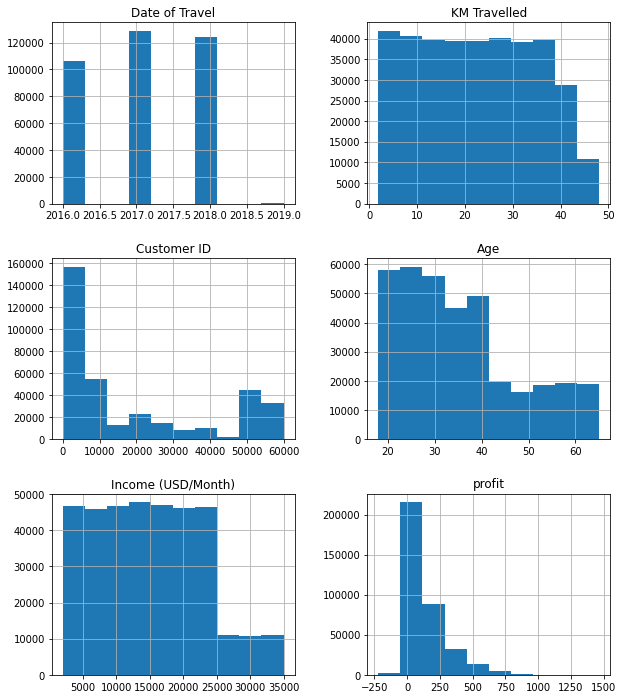

In [78]:
ffdf.hist(figsize= (10 , 12))

In [79]:
ffdf.columns

Index(['Date of Travel', 'Company', 'City', 'KM Travelled', 'Customer ID',
       'Gender', 'Age', 'Income (USD/Month)', 'Payment_Mode', 'Population',
       'Users', 'profit'],
      dtype='object')

In [80]:
ffdf['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

In [81]:
ffdf['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

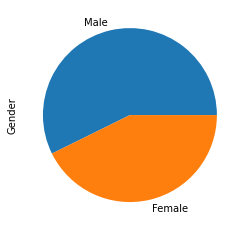

In [82]:
ffdf['Gender'].value_counts().plot(kind='pie')


In [83]:
ffdf['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

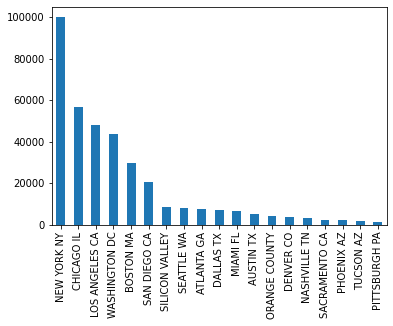

In [84]:
ffdf['City'].value_counts().plot(kind='bar')


In [85]:
ffdf['profit']

0         57.3150
1         23.6660
2         27.5680
3         25.7980
4         16.8440
           ...   
359387     5.8800
359388     6.9020
359389    87.4200
359390    32.1420
359391    13.9608
Name: profit, Length: 359392, dtype: float64

In [86]:
sum(ffdf['profit'])

49327701.491800345

In [87]:
for x in (2016 , 2017 , 2018 , 2019):
  print("profits in " , x , " : " ,  np.sum(ffdf[ffdf['Date of Travel'] == x]['profit']))


profits in  2016  :  15473393.464199997
profits in  2017  :  18620049.1972
profits in  2018  :  15188433.940000001
profits in  2019  :  45824.890400000004


In [88]:
pinkcab = ffdf[ffdf['Company'] == "Pink Cab"]

In [89]:
yellowcab = ffdf[ffdf['Company'] == "Yellow Cab"]

In [90]:
yc16 = yellowcab[yellowcab['Date of Travel'] == 2016]
yc17 = yellowcab[yellowcab['Date of Travel'] == 2017]
yc18 = yellowcab[yellowcab['Date of Travel'] == 2018]
yc19 = yellowcab[yellowcab['Date of Travel'] == 2019]

In [91]:
pc16 = pinkcab[pinkcab['Date of Travel'] == 2016]
pc17 = pinkcab[pinkcab['Date of Travel'] == 2017]
pc18 = pinkcab[pinkcab['Date of Travel'] == 2018]
pc19 = pinkcab[pinkcab['Date of Travel'] == 2019]

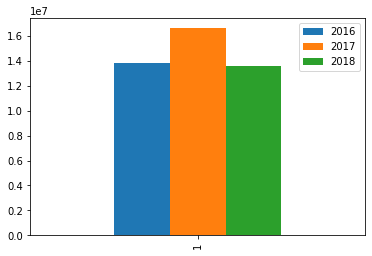

In [92]:
yc6 = np.sum(yc16['profit'].values)
yc7 = np.sum(yc17['profit'].values)
yc8 = np.sum(yc18['profit'].values)

index = [ 1]
df = pd.DataFrame({'2016': yc6,
                   '2017': yc7 ,
                   '2018' : yc8 ,
                   } , index = index)

ax = df.plot.bar(stacked=False)

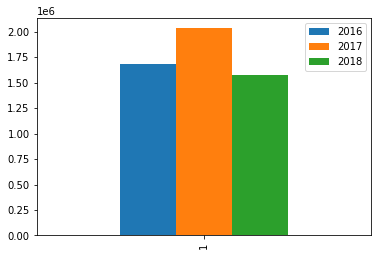

In [93]:
pc6 = np.sum(pc16['profit'].values)
pc7 = np.sum(pc17['profit'].values)
pc8 = np.sum(pc18['profit'].values)


index = [ 1]
df = pd.DataFrame({'2016': pc6,
                   '2017': pc7 ,
                   '2018' : pc8 ,
                  } , index = index)

ax = df.plot.bar(stacked=False)

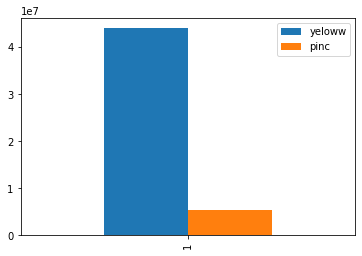

In [94]:
yelp = np.sum(yellowcab['profit'].values)
pinp = np.sum(pinkcab['profit'].values)


index = [ 1]
df = pd.DataFrame({'yeloww': yelp,
                   'pinc': pinp ,
                   } , index = index)
df.to_excel("dfv.xlsx")
ax = df.plot.bar(stacked=False)

In [95]:
yellowcab['City'].value_counts()

NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: City, dtype: int64

In [96]:
pinkcab['City'].value_counts()

LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: City, dtype: int64

In [97]:
sum(pinkcab['profit'])

5307328.320999971

In [98]:
sum(yellowcab['profit'])

44020373.17079992

In [99]:
dates = (2016 , 2017 , 2018 )
profits = ( yc6 , yc7 , yc8 )
print("profits for yellow cab")
for x in zip(dates , profits):
  print(x)

profits for yellow cab
(2016, 13786935.951200001)
(2017, 16586614.063199997)
(2018, 13609461.478000002)


In [100]:
dates = (2016 , 2017 , 2018 )
profits = ( pc6 , pc7 , pc8 )
print("profits for pink cab")
for x in zip(dates , profits):
  print(x)

profits for pink cab
(2016, 1686457.513)
(2017, 2033435.134)
(2018, 1578972.4620000003)


In [101]:
agegrouping = pd.DataFrame({'Age': ffdf['Age'] , 'company' : ffdf['Company']})

bins= [0,25,40,60,110]
labels = ['18-25','25-40','40-60','60+']
agegrouping['AgeGroup'] = pd.cut(agegrouping['Age'], bins=bins, labels=labels, right=False)
agegrouping

,Age,company,AgeGroup
0,28,Pink Cab,25-40
1,27,Pink Cab,25-40
2,53,Pink Cab,40-60
3,23,Pink Cab,18-25
4,33,Pink Cab,25-40
...,...,...,...
359387,24,Yellow Cab,18-25
359388,32,Yellow Cab,25-40
359389,56,Yellow Cab,40-60
359390,32,Yellow Cab,25-40


In [102]:
agegrouping[agegrouping['company'] == 'Pink Cab']['AgeGroup'].value_counts()

25-40    40069
40-60    19907
18-25    19306
60+       5429
Name: AgeGroup, dtype: int64

In [103]:
agegrouping[agegrouping['company'] == 'Yellow Cab']['AgeGroup'].value_counts()

25-40    130162
40-60     65197
18-25     62065
60+       17257
Name: AgeGroup, dtype: int64

In [104]:
ffdf[['KM Travelled' , 'profit']]

,KM Travelled,profit
0,30.45,57.3150
1,28.62,23.6660
2,9.04,27.5680
3,33.17,25.7980
4,8.73,16.8440
...,...,...
359387,4.80,5.8800
359388,8.40,6.9020
359389,27.75,87.4200
359390,8.80,32.1420


In [105]:
print("km travelled by yellow cabs" ,sum (yellowcab['KM Travelled']))
print("km travelled by pink cabs" ,sum (pinkcab['KM Travelled']))

km travelled by yellow cabs 6199417.470000072
km travelled by pink cabs 1911073.1099999654


In [106]:
print("total profit per km")
sum(ffdf['profit']) /sum (ffdf['KM Travelled'])

total profit per km


6.08196273767198

In [107]:
print("profit per km for yellow cab")

sum(yellowcab['profit']) /sum (yellowcab['KM Travelled'])

profit per km for yellow cab


7.100727347984101

In [108]:
print("profit per km for pink cab")

sum(pinkcab['profit']) /sum (pinkcab['KM Travelled'])

profit per km for pink cab


2.7771456221264432

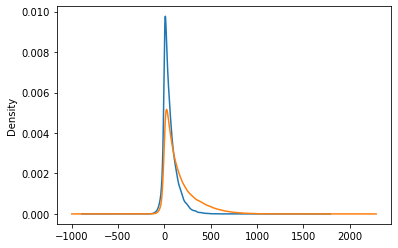

In [109]:
pinkcab['profit'].plot(kind='kde')
yellowcab['profit'].plot(kind='kde')

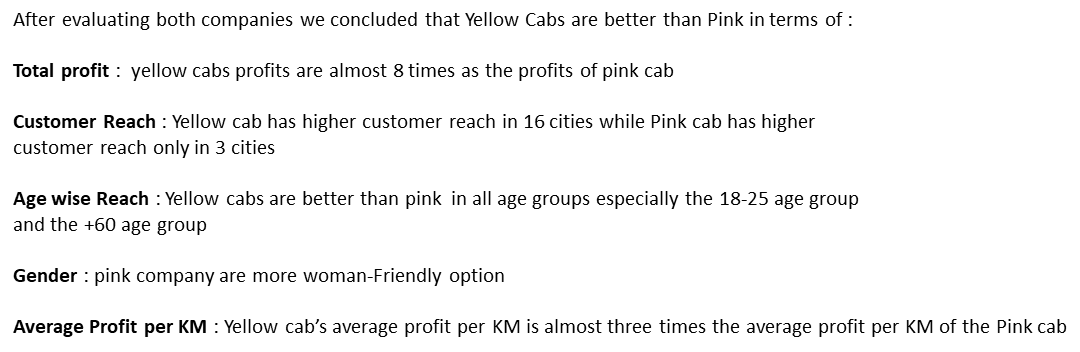